In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

import os

from sklearn.metrics import roc_curve, auc, r2_score
from sklearn.metrics import RocCurveDisplay, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import KFold, GridSearchCV
from optuna.integration import OptunaSearchCV
from sklearn import tree


In [2]:
df = pd.read_csv('train.csv', header = 0)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.drop(columns = ['GarageYrBlt','YrSold','MasVnrType','YearRemodAdd','MoSold','MasVnrArea','Id'], inplace = True) 

In [5]:
df['Alley'].fillna('NAA', inplace = True)

In [6]:
df['PoolQC'].fillna('NP', inplace = True)

In [7]:
df['BsmtQual'].fillna('NB', inplace = True)

In [8]:
df['BsmtCond'].fillna('NB', inplace = True)

In [9]:
df['BsmtExposure'].fillna('NB', inplace = True)

In [10]:
df['BsmtFinType1'].fillna('NB', inplace = True)

In [11]:
df['BsmtFinType2'].fillna('NB', inplace = True)

In [12]:
df['FireplaceQu'].fillna('NF', inplace = True)

In [13]:
df['GarageType'].fillna('NG', inplace = True)

In [14]:
df['GarageFinish'].fillna('NG', inplace = True)

In [15]:
df['GarageQual'].fillna('NG', inplace = True)

In [16]:
df['GarageCond'].fillna('NG', inplace = True)

In [17]:
df['PoolQC'].fillna('NP', inplace  = True)

In [18]:
df['Fence'].fillna('NF', inplace  = True)

In [19]:
df['MiscFeature'].fillna('None', inplace  = True)

In [20]:
variables_to_fill = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','GarageCars','GarageArea','Fireplaces','MiscVal','LotFrontage']

In [21]:
df[variables_to_fill]=df[variables_to_fill].fillna(0)

In [22]:
df[variables_to_fill].isna().value_counts()

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  GarageCars  GarageArea  Fireplaces  MiscVal  LotFrontage
False       False        False          False      False        False     False       False       False       False    False          1460
Name: count, dtype: int64

In [23]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NAA,Reg,Lvl,AllPub,Inside,...,0,0,0,NP,NF,None,0,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NAA,Reg,Lvl,AllPub,FR2,...,0,0,0,NP,NF,None,0,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NAA,IR1,Lvl,AllPub,Inside,...,0,0,0,NP,NF,None,0,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NAA,IR1,Lvl,AllPub,Corner,...,0,0,0,NP,NF,None,0,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NAA,IR1,Lvl,AllPub,FR2,...,0,0,0,NP,NF,None,0,WD,Normal,250000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [25]:
df.dropna(axis = 'index', subset=['Electrical'],inplace  = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [27]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,57.612748,10517.363948,6.100069,5.575737,1971.244003,443.943797,46.581220,567.366004,1057.891021,...,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,180930.394791
std,42.310746,34.673850,9984.666267,1.383171,1.113079,30.199555,456.106417,161.369977,441.992392,438.500975,...,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,79468.964025
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,20.000000,42.000000,7549.000000,5.000000,5.000000,1954.000000,0.000000,0.000000,223.000000,796.000000,...,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129950.000000
50%,50.000000,63.000000,9477.000000,6.000000,5.000000,1973.000000,384.000000,0.000000,479.000000,992.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,712.500000,0.000000,808.000000,1298.500000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [28]:
df.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NP,NF,None,WD,Normal
1,RL,Pave,NAA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NP,NF,None,WD,Normal
2,RL,Pave,NAA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NP,NF,None,WD,Normal
3,RL,Pave,NAA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NP,NF,None,WD,Abnorml
4,RL,Pave,NAA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NP,NF,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NP,NF,None,WD,Normal
1456,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NP,MnPrv,None,WD,Normal
1457,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NP,GdPrv,Shed,WD,Normal
1458,RL,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NP,NF,None,WD,Normal


In [29]:
unique_counts = df.nunique()
unique_counts_equal_to_1 = unique_counts[unique_counts == 1]
print(unique_counts_equal_to_1)

Series([], dtype: int64)


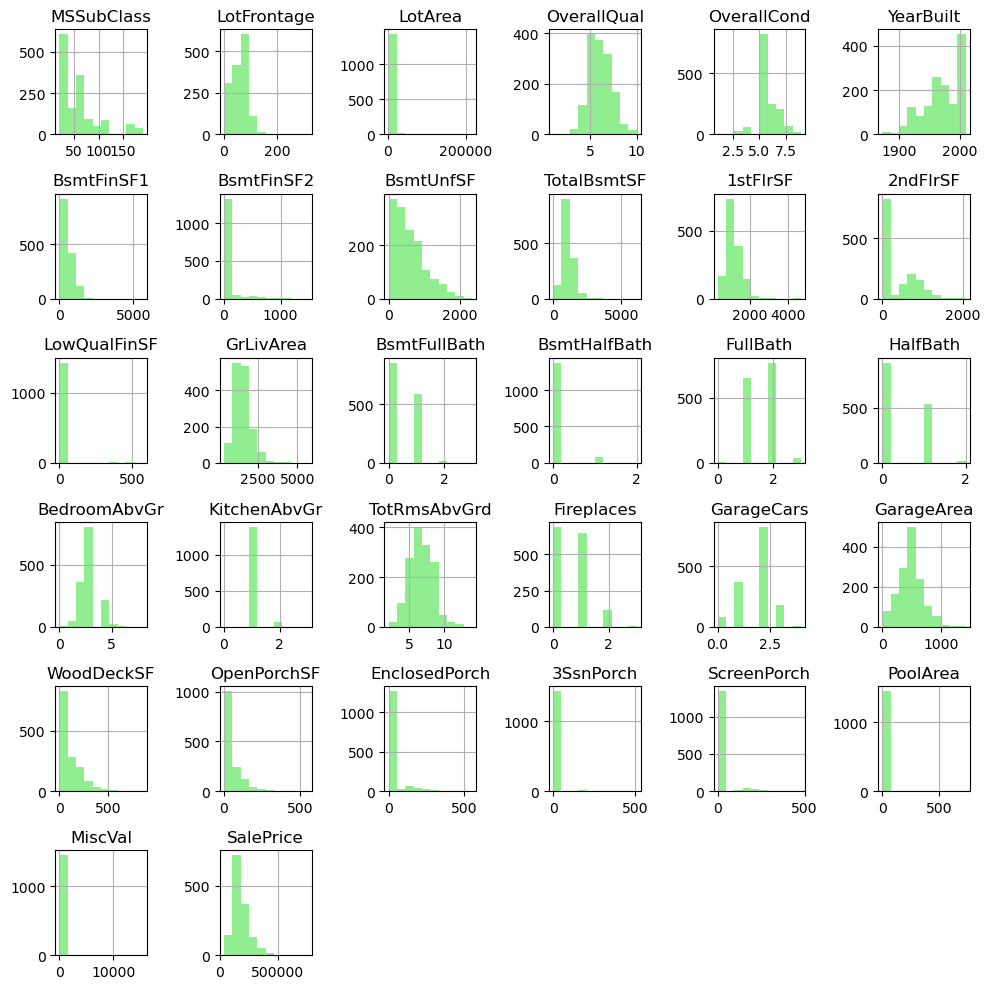

In [30]:
df.hist(figsize=(10,10),color='lightgreen')
plt.tight_layout()

Text(0.5, 1.0, 'SalePrice')

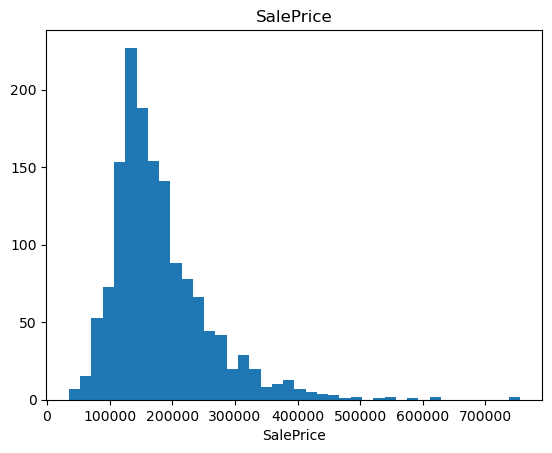

In [31]:
plt.hist(df["SalePrice"], bins=40)
plt.xlabel("SalePrice")
plt.title("SalePrice")

/opt/software/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'SalePrice')

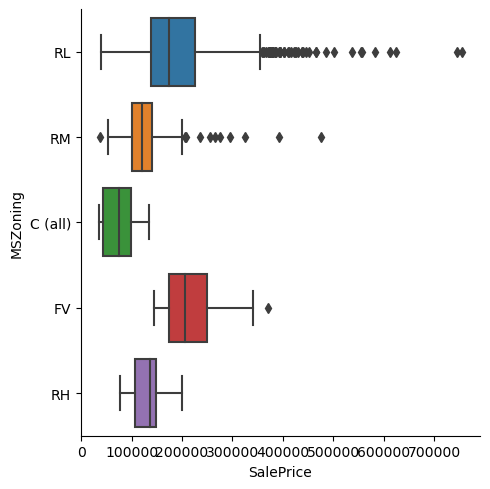

In [32]:
sns.catplot(data=df, x="SalePrice", y="MSZoning", kind="box")
plt.xlabel("SalePrice")

Text(0.5, 0, 'YearBuilt')

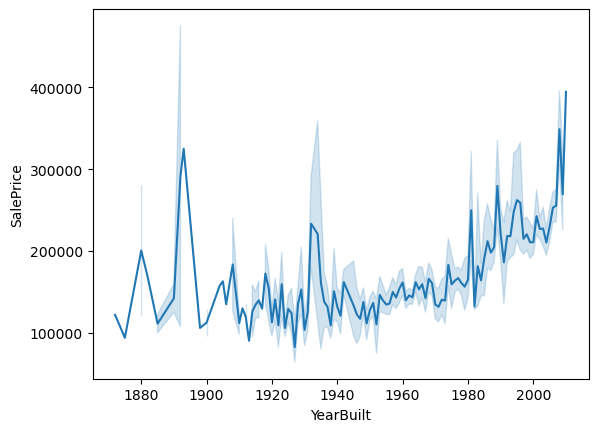

In [33]:
sns.lineplot(data=df, x="YearBuilt", y="SalePrice", estimator="mean")
plt.xlabel("YearBuilt")

Text(0.5, 0, 'Overallqual')

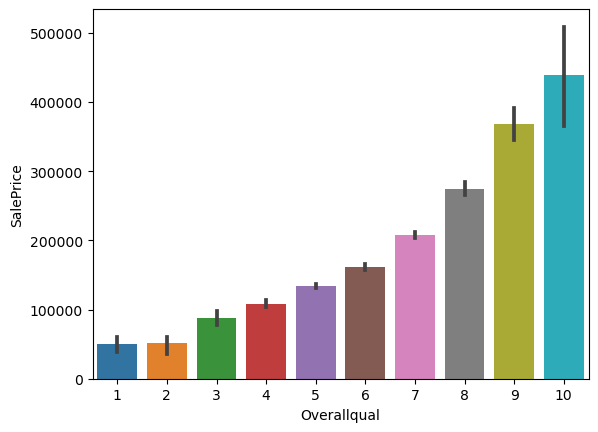

In [34]:
sns.barplot(data=df, x="OverallQual", y="SalePrice", estimator="mean")
plt.xlabel("Overallqual")

In [35]:
class_counts = df["MSZoning"].value_counts()
class_counts

MSZoning
RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

/tmp/ipykernel_574/149879976.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


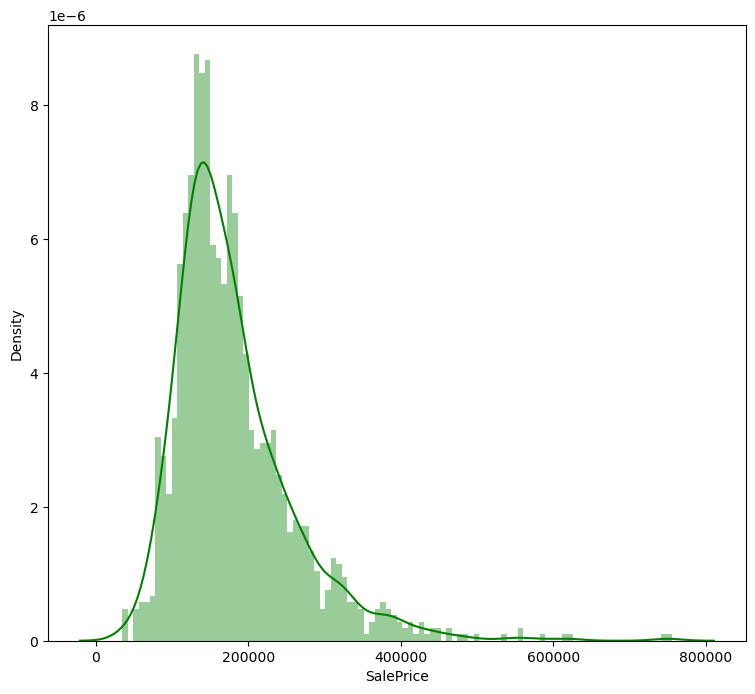

In [36]:
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [37]:
df = pd.get_dummies(df, columns=[
    'MSSubClass',
    "MSZoning",
    "Street",
    "Alley",
    "LotShape",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "TotRmsAbvGrd",
    "GarageType",
    "PavedDrive",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
    "LandContour",
    "Utilities"   
])


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Columns: 250 entries, LotFrontage to Utilities_NoSeWa
dtypes: bool(204), float64(1), int64(29), object(16)
memory usage: 826.4+ KB


In [39]:
df.reset_index(inplace=True, drop=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 250 entries, LotFrontage to Utilities_NoSeWa
dtypes: bool(204), float64(1), int64(29), object(16)
memory usage: 815.1+ KB


In [41]:
ordinal_Ex_Poor = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
ordinal_Ex_Poor_NB = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NB' : 0}
ordinal_Good_Poor_NB = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NB': 0}
ordinal_Good_Unf_NB = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NB':0}
ordinal_Functional = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev':1, 'Sal':0}
ordinal_Ex_Poor_NF = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NF' : 0}
ordinal_Ex_Poor_NG = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NG' : 0}
ordinal_Ex_Poor_NP = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NP' : 0}
ordinal_Fence = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NF': 0}
ordinal_Garage_finished = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NG': 0}

In [42]:
df['ExterQual_encoded'] = df['ExterQual'].replace(ordinal_Ex_Poor)

In [43]:
df[['ExterQual_encoded','ExterQual']].value_counts()

ExterQual_encoded  ExterQual
3                  TA           905
4                  Gd           488
5                  Ex            52
2                  Fa            14
Name: count, dtype: int64

In [44]:
df['ExterCond_encoded'] = df['ExterCond'].replace(ordinal_Ex_Poor)

In [45]:
df[['ExterCond_encoded','ExterCond']].value_counts()

ExterCond_encoded  ExterCond
3                  TA           1281
4                  Gd            146
2                  Fa             28
5                  Ex              3
1                  Po              1
Name: count, dtype: int64

In [46]:
df['BsmtQual_encoded'] = df['BsmtQual'].replace(ordinal_Ex_Poor_NB)

In [47]:
df[['BsmtQual_encoded','BsmtQual']].value_counts()

BsmtQual_encoded  BsmtQual
3                 TA          649
4                 Gd          617
5                 Ex          121
0                 NB           37
2                 Fa           35
Name: count, dtype: int64

In [48]:
df['BsmtCond_encoded'] = df['BsmtCond'].replace(ordinal_Ex_Poor_NB)

In [49]:
df[['BsmtCond_encoded','BsmtCond']].value_counts()

BsmtCond_encoded  BsmtCond
3                 TA          1310
4                 Gd            65
2                 Fa            45
0                 NB            37
1                 Po             2
Name: count, dtype: int64

In [50]:
df['BsmtExposure_encoded'] = df['BsmtExposure'].replace(ordinal_Good_Poor_NB)

In [51]:
df[['BsmtExposure_encoded','BsmtExposure']].value_counts()

BsmtExposure_encoded  BsmtExposure
1                     No              952
3                     Av              221
4                     Gd              134
2                     Mn              114
0                     NB               38
Name: count, dtype: int64

In [52]:
df['BsmtFinType1_encoded'] = df['BsmtFinType1'].replace(ordinal_Good_Unf_NB)

In [53]:
df[['BsmtFinType1_encoded','BsmtFinType1']].value_counts()

BsmtFinType1_encoded  BsmtFinType1
1                     Unf             429
6                     GLQ             418
5                     ALQ             220
4                     BLQ             148
3                     Rec             133
2                     LwQ              74
0                     NB               37
Name: count, dtype: int64

In [54]:
df['BsmtFinType2_encoded'] = df['BsmtFinType2'].replace(ordinal_Good_Unf_NB)

In [55]:
df[['BsmtFinType2_encoded','BsmtFinType2']].value_counts()

BsmtFinType2_encoded  BsmtFinType2
1                     Unf             1255
3                     Rec               54
2                     LwQ               46
0                     NB                38
4                     BLQ               33
5                     ALQ               19
6                     GLQ               14
Name: count, dtype: int64

In [56]:
df['HeatingQC_encoded'] = df['HeatingQC'].replace(ordinal_Ex_Poor)

In [57]:
df[['HeatingQC_encoded','HeatingQC']].value_counts()

HeatingQC_encoded  HeatingQC
5                  Ex           741
3                  TA           428
4                  Gd           240
2                  Fa            49
1                  Po             1
Name: count, dtype: int64

In [58]:
df['KitchenQual_encoded'] = df['KitchenQual'].replace(ordinal_Ex_Poor)

In [59]:
df[['KitchenQual_encoded','KitchenQual']].value_counts()

KitchenQual_encoded  KitchenQual
3                    TA             735
4                    Gd             585
5                    Ex             100
2                    Fa              39
Name: count, dtype: int64

In [60]:
df['Functional_encoded'] = df['Functional'].replace(ordinal_Functional)

In [61]:
df[['Functional_encoded','Functional']].value_counts()

Functional_encoded  Functional
7                   Typ           1359
5                   Min2            34
6                   Min1            31
4                   Mod             15
3                   Maj1            14
2                   Maj2             5
1                   Sev              1
Name: count, dtype: int64

In [62]:
df['FireplaceQu_encoded'] = df['FireplaceQu'].replace(ordinal_Ex_Poor_NF)

In [63]:
df[['FireplaceQu_encoded','FireplaceQu']].value_counts()

FireplaceQu_encoded  FireplaceQu
0                    NF             689
4                    Gd             380
3                    TA             313
2                    Fa              33
5                    Ex              24
1                    Po              20
Name: count, dtype: int64

In [64]:
df['GarageQual_encoded'] = df['GarageQual'].replace(ordinal_Ex_Poor_NG)

In [65]:
df[['GarageQual_encoded','GarageQual']].value_counts()

GarageQual_encoded  GarageQual
3                   TA            1310
0                   NG              81
2                   Fa              48
4                   Gd              14
1                   Po               3
5                   Ex               3
Name: count, dtype: int64

In [66]:
df['GarageCond_encoded'] = df['GarageCond'].replace(ordinal_Ex_Poor_NG)

In [67]:
df[['GarageCond_encoded','GarageCond']].value_counts()

GarageCond_encoded  GarageCond
3                   TA            1325
0                   NG              81
2                   Fa              35
4                   Gd               9
1                   Po               7
5                   Ex               2
Name: count, dtype: int64

In [68]:
df['PoolQC_encoded'] = df['PoolQC'].replace(ordinal_Ex_Poor_NP)

In [69]:
df[['PoolQC_encoded','PoolQC']].value_counts()

PoolQC_encoded  PoolQC
0               NP        1452
4               Gd           3
2               Fa           2
5               Ex           2
Name: count, dtype: int64

In [70]:
df['Fence_encoded'] = df['Fence'].replace(ordinal_Fence)

In [71]:
df[['Fence_encoded','Fence']].value_counts()

Fence_encoded  Fence
0              NF       1178
3              MnPrv     157
4              GdPrv      59
2              GdWo       54
1              MnWw       11
Name: count, dtype: int64

In [72]:
df['GarageFinish_encoded'] = df['GarageFinish'].replace(ordinal_Garage_finished)

In [73]:
df[['GarageFinish_encoded','GarageFinish']].value_counts()

GarageFinish_encoded  GarageFinish
1                     Unf             605
2                     RFn             422
3                     Fin             351
0                     NG               81
Name: count, dtype: int64

In [74]:
df.drop(columns = ['Fence',
                  'PoolQC',
                  'GarageCond',
                  'GarageQual',
                   'FireplaceQu',
                   'Functional',
                   'KitchenQual',
                   'HeatingQC',
                   'BsmtFinType2',
                   'BsmtFinType1',
                   'BsmtExposure',
                   'BsmtCond',
                   'BsmtQual',
                   'ExterCond',
                   'ExterQual',
                   'GarageFinish'
                  ], inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 250 entries, LotFrontage to GarageFinish_encoded
dtypes: bool(204), float64(1), int64(45)
memory usage: 815.1 KB


In [76]:
X = df.drop(["SalePrice"], axis=1)
y = df["SalePrice"]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.3)

In [78]:
X.shape

(1459, 249)

In [79]:
y.shape

(1459,)

In [80]:
lr = LinearRegression().fit(X_train, y_train)

In [81]:
lr.coef_

array([ 1.42287684e+01,  3.59999107e-01,  8.60875566e+03,  5.07426672e+03,
        2.50642546e+02,  1.55972545e+01,  1.01400159e+01, -6.03095711e+00,
        1.97062862e+01,  3.01169110e+01,  3.46017976e+01, -5.05154547e+01,
        1.42032329e+01, -1.47426234e+03, -1.28952137e+03,  1.85365959e+03,
        4.49570624e+03, -4.18999221e+03, -6.34597566e+03,  7.01024479e+03,
        2.63684665e+03,  2.89209513e+01,  9.36540354e+00,  1.31292233e+01,
       -8.34734919e+00,  6.15132682e+01,  5.12873350e+01, -7.42079312e+01,
        6.72374277e+00,  7.11646716e+03,  6.63684264e+03,  1.09403023e+04,
        3.44165887e+04, -1.43096764e+02,  1.17808923e+04,  1.35928337e+04,
       -5.88167426e+03, -2.00303486e+03,  3.57764144e+03, -4.06317905e+03,
       -2.22092253e+04, -6.96598961e+02, -2.21800974e+04, -3.08846617e+04,
       -2.32735078e+04,  8.57210644e+03,  8.80089006e+03,  5.39329913e+02,
        5.36118139e+03, -7.31280366e+03,  7.31280366e+03, -1.54606366e+03,
        2.05774742e+02,  

In [82]:
y_pred = lr.predict(X_test)
print('Mean squared error (MSE) score: ', mean_squared_error(y_pred, y_test))
print('R squared (R2) score: ',r2_score(y_pred,y_test))
print('Model score: ', lr.score(X_test,y_test))

Mean squared error (MSE) score:  1807614527.4507494
R squared (R2) score:  0.7167736392126516
Model score:  0.6533351918839606


In [83]:
lr_sfs = LinearRegression()

sfs1 = SFS(
    lr_sfs,
    k_features=(1, X_train.shape[1]),
    forward=True,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [84]:
sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 249 out of 249 | elapsed:    2.1s finished
Features: 1/249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 248 out of 248 | elapsed:    0.7s finished
Features: 2/249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 247 out of 247 | elapsed:    1.2s finished
Features: 3/249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 246 out of 246 | elapsed:    1.1s finished
Features: 4/249[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 249),
                          n_jobs=-1, scoring='neg_mean_squared_error',
                          verbose=1)

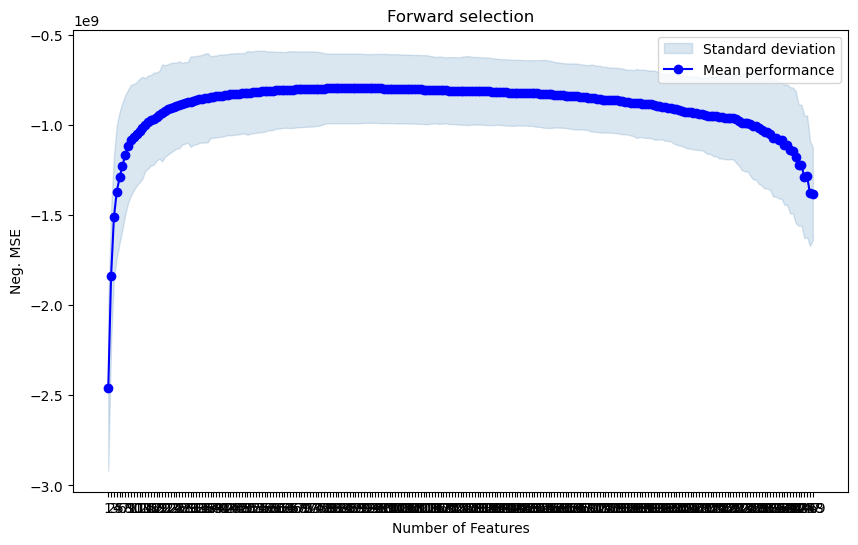

In [85]:
plot_sfs(sfs1.get_metric_dict(), ylabel="Neg. MSE", figsize=(10,6))
plt.title("Forward selection")
plt.legend(["Standard deviation", "Mean performance"])

In [86]:
sfs1.k_feature_names_

('LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'GrLivArea',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'MSSubClass_20',
 'MSSubClass_50',
 'MSSubClass_120',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'LotShape_IR2',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_SWISU',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_Norm',
 'Condition1_RRAn',
 'Condition2_Artery',
 'Condition2_PosA',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_1Fam',
 'HouseStyle_1Story',
 'RoofStyle_Flat',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'Roo

In [87]:
pd.DataFrame(sfs1.get_metric_dict())

,1,2,3,4,5,6,7,8,9,10,...,240,241,242,243,244,245,246,247,248,249
feature_idx,"(2,)","(2, 12)","(2, 5, 12)","(2, 5, 12, 241)","(2, 5, 12, 82, 241)","(2, 5, 12, 82, 237, 241)","(2, 5, 12, 29, 82, 237, 241)","(2, 5, 12, 29, 81, 82, 237, 241)","(2, 5, 12, 29, 81, 82, 226, 237, 241)","(2, 5, 12, 29, 55, 81, 82, 226, 237, 241)",...,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
cv_scores,"[-2342717537.8781567, -2737289513.8958263, -22...","[-2131487379.3878543, -1697452998.4705637, -15...","[-2020360799.0157013, -1344454242.090576, -140...","[-1986377966.4655643, -1172041556.3089294, -12...","[-1918531799.4810863, -1134327924.6425521, -10...","[-1833623712.1623774, -1103383139.8873606, -99...","[-1763062445.5254934, -1003005769.7952023, -93...","[-1680715970.933984, -888015637.4344084, -9301...","[-1646681456.3052416, -953640064.2856702, -848...","[-1605140420.3188343, -912871887.9636647, -848...",...,"[-1738504244.9474144, -943934217.825801, -8097...","[-1774436531.146387, -950028674.3912158, -7945...","[-1774436531.145777, -944961584.9973902, -7945...","[-1805796269.5121906, -945514151.7747034, -817...","[-1807640170.9372907, -989208934.5597509, -851...","[-1807640170.937492, -989208934.5593051, -8519...","[-1829274440.1582906, -993870047.4249827, -861...","[-1829274440.1589813, -999477877.1431607, -861...","[-1712432236.4036915, -1029682934.675289, -174...","[-1712267559.4299028, -1076447124.4277267, -16..."
avg_score,-2462076005.179141,-1836477297.936919,-1509728442.988979,-1369180956.596471,-1291043505.772018,-1228163168.717676,-1164133916.223538,-1117528497.793498,-1084260806.995014,-1066848717.013292,...,-1109446710.762368,-1140321532.0731,-1141700622.809399,-1178133392.84886,-1222835684.917508,-1222835684.917434,-1287063438.842952,-1285429705.153014,-1379274855.647108,-1380817607.98993
feature_names,"(OverallQual,)","(OverallQual, GrLivArea)","(OverallQual, BsmtFinSF1, GrLivArea)","(OverallQual, BsmtFinSF1, GrLivArea, KitchenQu...","(OverallQual, BsmtFinSF1, GrLivArea, Neighborh...","(OverallQual, BsmtFinSF1, GrLivArea, Neighborh...","(OverallQual, BsmtFinSF1, GrLivArea, MSSubClas...","(OverallQual, BsmtFinSF1, GrLivArea, MSSubClas...","(OverallQual, BsmtFinSF1, GrLivArea, MSSubClas...","(OverallQual, BsmtFinSF1, GrLivArea, MSSubClas...",...,"(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon...","(LotFrontage, LotArea, OverallQual, OverallCon..."
ci_bound,586738481.207813,472341882.601144,432298579.381082,472425878.260732,466739493.591128,451037700.436816,424775905.598267,402675389.46986,395297083.367851,379273374.032127,...,429319649.957041,450109672.003957,449048958.115127,471278084.840533,431633319.002616,431633319.002859,436574481.938514,434679186.389781,374972187.058584,331296306.994073
std_dev,456502471.814321,367498031.66989,336342981.362061,367563383.146659,363139182.68853,350922654.172954,330490085.589078,313295133.214006,307554560.401335,295087570.16007,...,334025273.066134,350200616.524014,349375345.082567,366670360.871429,335825386.186533,335825386.186722,339669778.818206,338195174.491874,291741100.569195,257759782.065811
std_err,228251235.907

In [92]:
sfs1.k_score_

-797153440.9484987

In [93]:
X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

In [94]:
lr_sfs.fit(X_train_sfs, y_train)

LinearRegression()

In [95]:
y_pred_sfs = lr_sfs.predict(X_test_sfs)
print('Mean squared error (MSE) score: ', mean_squared_error(y_pred_sfs, y_test))
print('R squared (R2) score: ',r2_score(y_pred_sfs,y_test))
print('Model score: ', lr_sfs.score(X_test_sfs, y_test))

Mean squared error (MSE) score:  1529827848.5579665
R squared (R2) score:  0.737569059559478
Model score:  0.7066091970842658


In [96]:
lr_sfs.coef_

array([ 2.37853486e-01,  8.62670552e+03,  5.09023615e+03,  2.54731966e+02,
        2.32415620e+01,  1.31883002e+01,  4.91267884e+01,  7.47754794e+03,
        4.50530729e+03,  2.59756074e+01, -2.33314696e+01,  4.69515664e+01,
       -7.80973765e+01, -4.62311563e+02,  7.76664151e+03, -1.50461618e+04,
       -2.96320035e+04,  3.23654310e+03,  1.49276114e+04,  1.20069653e+04,
        1.91074855e+04,  8.87985270e+03,  1.33374177e+04,  1.28753210e+04,
        7.03722027e+03,  1.70283615e+04,  1.11986866e+04, -4.45193002e+03,
        2.49313296e+04, -9.12429854e+03,  2.74049796e+04,  4.90246029e+04,
        4.70372066e+04,  1.04252050e+04,  1.34222342e+04,  6.24553120e+04,
        2.89411981e+04,  1.62649526e+04,  1.86029270e+04,  2.64062363e+04,
        8.59271386e+04, -6.08636476e+04,  3.63797881e-11,  2.29333261e+04,
        2.19497497e+04,  1.08474884e+04,  6.91428817e+03, -5.30986945e+03,
        1.45519152e-11,  3.74176701e+04,  5.09317033e-11, -1.31149392e+04,
        7.59741991e+04,  

In [97]:
lr_sfs.intercept_

-702711.127979979

In [98]:
errors = y_pred_sfs - y_test

Text(0, 0.5, 'Density')

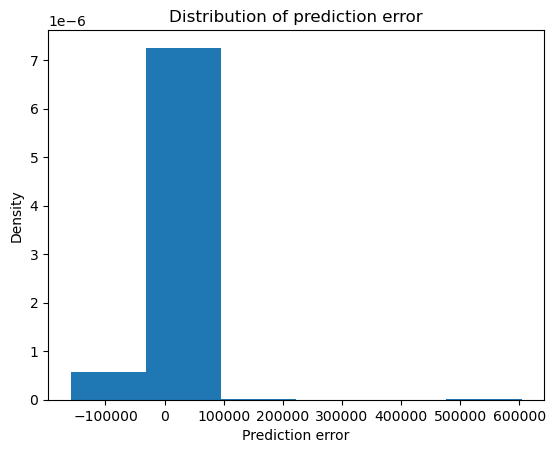

In [99]:
plt.hist(errors, bins=6, density=True)
plt.title("Distribution of prediction error")
plt.xlabel("Prediction error")
plt.ylabel("Density")

Text(0, 0.5, 'Predicted value')

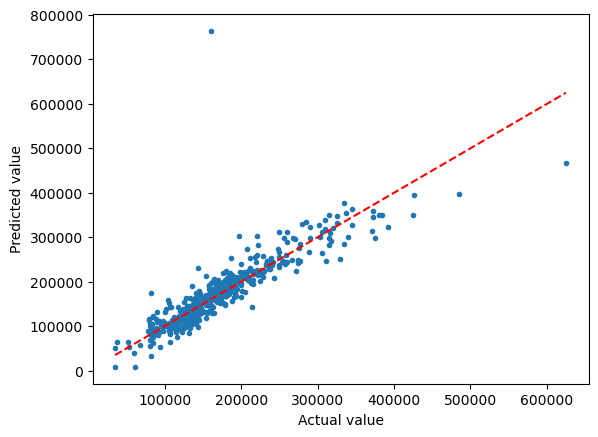

In [100]:
plt.plot(y_test, y_pred_sfs, '.')
minval, maxval = np.min(y_test), np.max(y_test)
plt.plot([minval, maxval], [minval, maxval], 'r--')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

Text(0, 0.5, 'Prediction error')

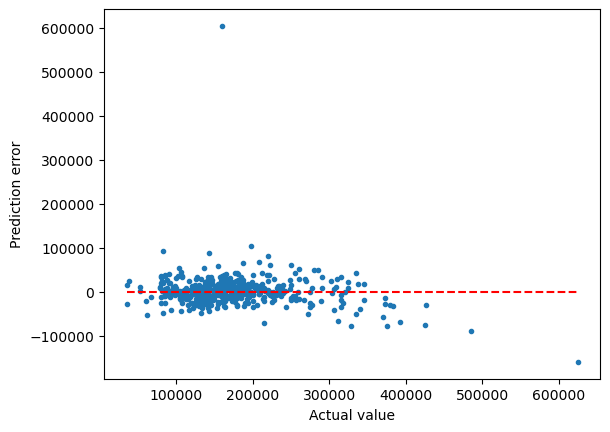

In [101]:
plt.plot(y_test, errors, '.')
plt.hlines(y=0, xmin=minval, xmax=maxval, linestyles="--", colors='r')
plt.xlabel("Actual value")
plt.ylabel("Prediction error")

In [102]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [103]:
lasso_original = Lasso(alpha=1.0)
lasso_original.fit(X_train_standardized, y_train)

/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.119e+10, tolerance: 6.907e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [104]:
y_pred_original = lasso_original.predict(X_test_standardized)
print('Mean squared error (MSE) score: ', mean_squared_error(y_pred_original, y_test))
print('R squared (R2) score: ',r2_score(y_pred_original,y_test))
print('Model score: ', lasso_original.score(X_test_standardized, y_test))

Mean squared error (MSE) score:  1785415743.2378323
R squared (R2) score:  0.7192186279654738
Model score:  0.6575924807874931


In [107]:
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)
lasso.fit(X_train_standardized, y_train)

/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1533624771.4042358, tolerance: 563405665.7429878
  model = cd_fast.enet_coordinate_descent_gram(
/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1207734211.994629, tolerance: 563405665.7429878
  model = cd_fast.enet_coordinate_descent_gram(
/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1171487616.5716553, tolerance: 563405665.7429878
  model = cd_fast.enet_coordinate_descent_gram(
/opt/software/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: 

LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0], cv=5)

In [108]:
print("Selected alpha:", lasso.alpha_)

Selected alpha: 10.0


In [109]:
lasso_coefs = lasso.coef_
selected_features = X.columns[lasso_coefs != 0]

In [110]:
print("Selected features:", selected_features)

Selected features: Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'HeatingQC_encoded',
       'KitchenQual_encoded', 'Functional_encoded', 'FireplaceQu_encoded',
       'GarageQual_encoded', 'GarageCond_encoded', 'PoolQC_encoded',
       'Fence_encoded'],
      dtype='object', length=215)


Text(0, 0.5, 'Predicted value')

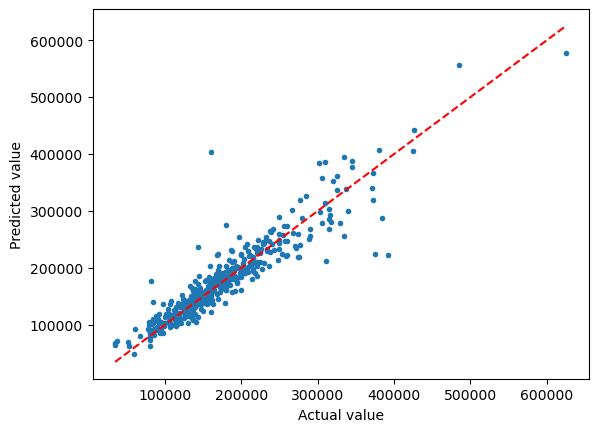

In [122]:
plt.plot(y_test, y_pred, '.')
minval, maxval = np.min(y_test), np.max(y_test)
plt.plot([minval, maxval], [minval, maxval], 'r--')
plt.xlabel("Actual value")
plt.ylabel("Predicted value")

In [111]:
y_pred = lasso.predict(X_test_standardized)
print('Mean squared error (MSE) score: ', mean_squared_error(y_pred, y_test))
print('R squared (R2) score: ',r2_score(y_pred,y_test))
print('Model score: ', lasso_original.score(X_test_standardized, y_test))

Mean squared error (MSE) score:  1747195969.4903564
R squared (R2) score:  0.7231035187368924
Model score:  0.6575924807874931


In [114]:
crossvalidation=KFold(n_splits=10, shuffle=True, random_state=1)
for depth in range(1, 10):
     tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(X_train,y_train.values.ravel()).tree_.max_depth < depth:
         break
     score=np.mean(cross_val_score(tree_regressor,X_train,y_train.values.ravel(), scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1))
     print(depth, score)


1 -3518694492.176834
2 -2654735168.4966226
3 -2074040533.2589574
4 -1958542175.067453
5 -1994852060.9047744
6 -1902998435.3408856
7 -2355162235.6544356
8 -2208973856.609786
9 -2517914766.953231


In [116]:
# Define the XGBoost Regressor model
model_xgb = XGBRegressor()

# Define the hyperparameter grid for GridSearchCV
param_test1 = {
    'min_child_weight': [1, 2, 3],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'n_estimators': [100, 150, 200, 250]
}

# Create a GridSearchCV object
xgb_gs = GridSearchCV(estimator=model_xgb,
                      param_grid=param_test1,
                      n_jobs=4,
                      cv=crossvalidation)

# Fit the model with the hyperparameter grid to find the best parameters
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 150, 200, 250]})

In [117]:
# Print the best hyperparameters and best score
print('max_depth_min_child_weight')
print('Best Parameters:', xgb_gs.best_params_)
print('Best Score:', xgb_gs.best_score_)

max_depth_min_child_weight
Best Parameters: {'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150}
Best Score: 0.8212614100517049


In [118]:
# Create a new XGBoost Regressor with the best hyperparameters
best_params = xgb_gs.best_params_
model_xgb2 = XGBRegressor(n_estimators=best_params['n_estimators'],
                         min_child_weight=best_params['min_child_weight'],
                         max_depth=best_params['max_depth'])

In [119]:
# Train the model with the best hyperparameters
model_xgb2.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [121]:
# Make predictions on the test data
y_pred = model_xgb2.predict(X_test)
# Get R_2 score of XGBoost Regressor
score = model_xgb2.score(X_test,y_test)
print("Model score:",score)
# Calculate Mean Squared Error (MAE) for regression
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.2f" % mse)
#Calculate R2 score 
r2 = r2_score(y_pred,y_test)
print("R2 score:", r2)

Model score: 0.8522767196373697
Mean Squared Error: 770273593.90
R2 score: 0.8458909093473441
